<a href="https://colab.research.google.com/github/rezadwiputraa/UAS_Artifiicial-Intelegence_Reza-Dwi-Putra_20220801472/blob/main/UAS_Artificial_Intelegence_Reza_Dwi_Putra_20220801472.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Akhir Semester (UAS)
# Nama : Reza Dwi Putra
# Nim : 20220801472
# Mata Kuliah : Artificial Intelegence



# Import Libraries


In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **Langkah 1: Preprocessing Data**

# Upload Dataset Neflix

## df.head() : print data head netflix

In [30]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("netflix_titles.csv")
df.head()

Saving netflix_titles.csv to netflix_titles (1).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1.1 - Visualisasi pie Chart: Distribusi Film vs TV Show

### Pastikan data ada dan 'netflix_movies1' sudah terdefinisi
### df = pd.read_csv('netflix_titles.csv')
### Misalnya, filter data untuk hanya mencakup "TV Show" dan "Movie"

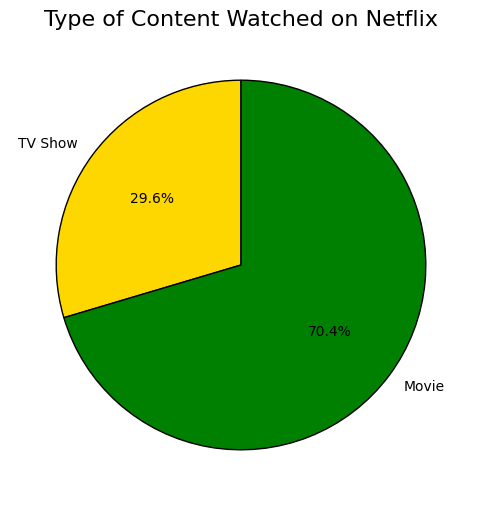

In [152]:
labels = ['TV Show', 'Movie']
values = [netflix_movies1['type'].value_counts().get('TV Show', 0),
          netflix_movies1['type'].value_counts().get('Movie', 0)]

colors = ['#ffd700', '#008000']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Type of Content Watched on Netflix', fontsize=16)
plt.gca().set_aspect('equal')

plt.show()


# 1.2 - visualisasi Distribusi Konten Netflix berdasarkan Tahun Rilis

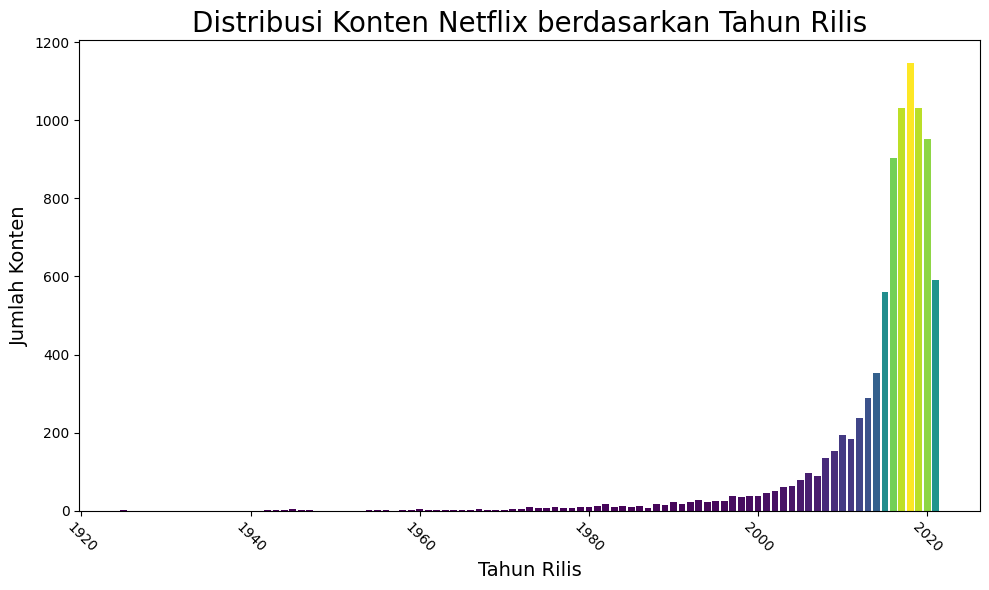

In [154]:

release_year_counts = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars = plt.bar(release_year_counts.index, release_year_counts.values, color=plt.cm.viridis(release_year_counts.values / max(release_year_counts.values)))

plt.title("Distribusi Konten Netflix berdasarkan Tahun Rilis", fontsize=20)
plt.xlabel("Tahun Rilis", fontsize=14)
plt.ylabel("Jumlah Konten", fontsize=14)

plt.xticks(rotation=-45)

# Menampilkan grafik
plt.tight_layout()
plt.show()



# 1.3 visualisasi pemanbahan film dan tv show


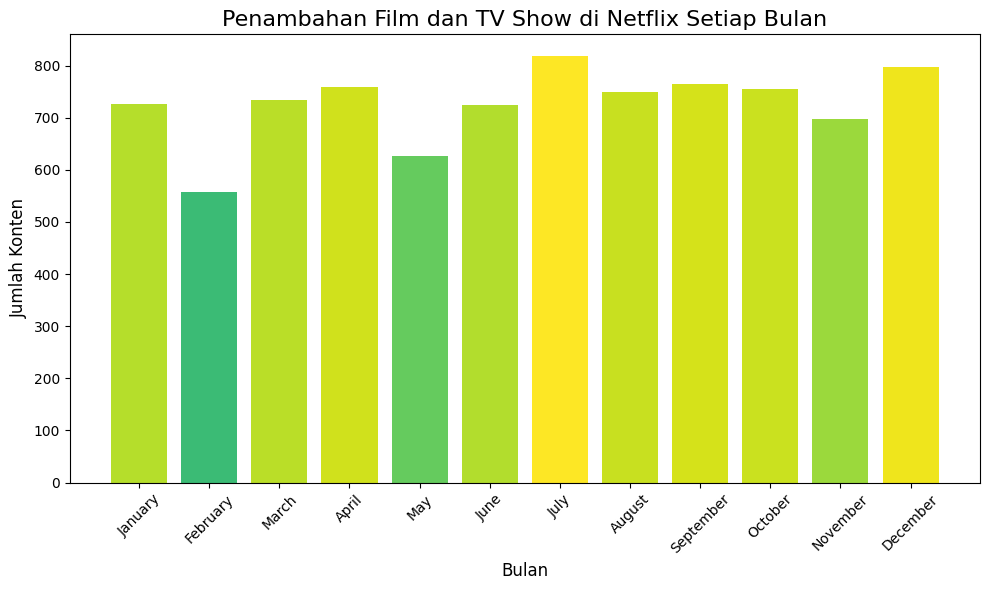

In [157]:
netflix_movies = df


netflix_movies['month_added'] = pd.to_datetime(netflix_movies['date_added'], errors='coerce').dt.month_name()

months_df = pd.DataFrame(netflix_movies['month_added'].value_counts())

months_df.reset_index(inplace=True, names='month')

months_df.rename(columns={'month_added': 'count'}, inplace=True)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_df['month'] = pd.Categorical(months_df['month'], categories=month_order, ordered=True)

months_df = months_df.sort_values('month')

plt.figure(figsize=(10, 6))

bars = plt.bar(months_df['month'], months_df['count'], color=plt.cm.viridis(months_df['count'] / max(months_df['count'])))

plt.title('Penambahan Film dan TV Show di Netflix Setiap Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)

plt.xticks(rotation=45)

# Menampilkan grafik
plt.tight_layout()
plt.show()


# 1.4 visualisasi frekuensi penambahan acara TV dan film setiap bulannya.



<Axes: xlabel='month_added', ylabel='count'>

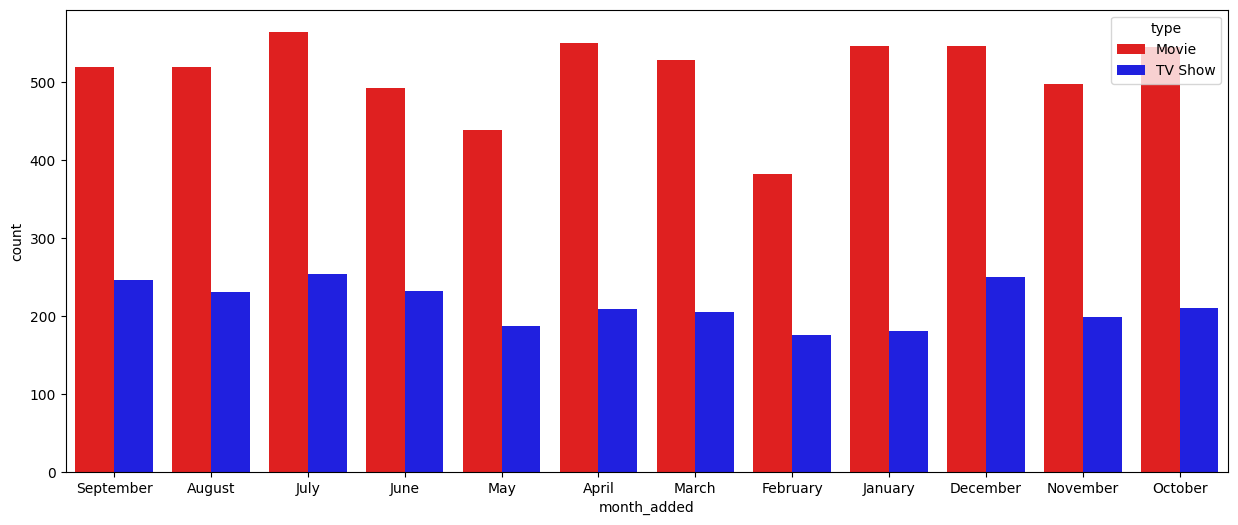

In [78]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type',lw=5, data=netflix_movies1, ax=ax,palette=['#FF0000' ,'#0000FF'])

# 2. Hapus Colom yang tidak Relavan


*   Kolom seperti show_id, director, cast, dll. dihapus karena tidak diperlukan untuk clustering.



In [120]:
df_cleaned = df.drop(columns=["show_id", "director", "cast", "description", "date_added", "month_added"])

# 3. Hapus data yang memiliki nilai kosong (missing values)

*   Menghapus baris yang memiliki data kosong agar analisis lebih akurat.

In [121]:
df_cleaned = df_cleaned.dropna()

# 4. Encoding data kategori ke angka

In [122]:
encoder = LabelEncoder()
df_cleaned["type"] = encoder.fit_transform(df_cleaned["type"])
df_cleaned["country"] = encoder.fit_transform(df_cleaned["country"])
df_cleaned["rating"] = encoder.fit_transform(df_cleaned["rating"])
df_cleaned["listed_in"] = encoder.fit_transform(df_cleaned["listed_in"])
print(df_cleaned[['type', 'country', 'rating', 'listed_in']].head())

   type  country  rating  listed_in
0     0      603       4        266
1     1      426       8        401
4     1      251       8        380
7     0      663       8        308
8     1      506       6        110




*       Kolom type, country, rating, dan listed_in diubah ke angka supaya bisa diproses oleh algoritma clustering.




# 5. Konversi release_year dan duration ke angka

In [123]:
df_cleaned["release_year"] = df_cleaned["release_year"].astype(int)
df_cleaned["duration"] = df_cleaned["duration"].str.extract("(\d+)").astype(float)
df_cleaned = df_cleaned.dropna()  # Hapus NaN setelah konversi
print(df_cleaned[['release_year', 'duration']].head())

   release_year  duration
0          2020      90.0
1          2021       2.0
4          2021       2.0
7          1993     125.0
8          2021       9.0


*   release_year diubah ke integer.
*   duration diekstrak angka saja (misalnya "90 min" jadi 90, "1 Season" jadi 1).


# **Langkah 2: Clustering dengan K-Means**

### Setelah data siap, lanjut ke proses clustering menggunakan K-Means.


# 1. Normalisasi Data


*   Normalisasi dilakukan agar skala data lebih seimbang dan clustering lebih akurat.

In [125]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=["title"]))

# 2. Jalankan K-Means Clustering

*   Menggunakan 3 klaster untuk mengelompokkan data.
*   Hasil klaster disimpan di kolom cluster.


In [126]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned["cluster"] = kmeans.fit_predict(df_scaled)

# 3. Lihat Hasil Clustering
*   Menampilkan jumlah data dalam setiap klaster.

In [128]:
df_cleaned["cluster"].value_counts()

,count
cluster,
2,3895
1,2275
0,1800


# 3.1. PCA Scatter Plot: Visualisasi Klaster

Menggunakan PCA untuk mereduksi dimensi dan memplot hasil clustering.

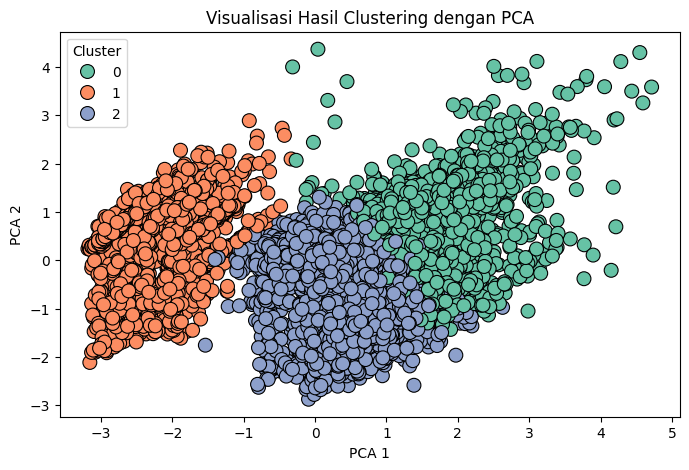

In [133]:
# Menjalankan PCA dan mereduksi dimensi menjadi 2 komponen utama
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_cleaned["cluster"], palette="Set2", s=100, edgecolor="black")

plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


# 3.2. Scatter Plot dengan Centroid (K-Means Saja)

Menampilkan titik pusat (centroid) untuk tiap klaster hasil K-Means

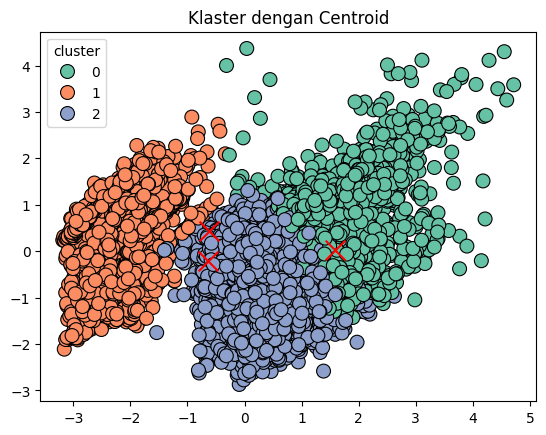

In [140]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned["cluster"], cmap="viridis", alpha=0.5)
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_cleaned["cluster"], palette="Set2", s=100, edgecolor="black")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="x", s=200)
plt.title("Klaster dengan Centroid")
plt.show()

# **Langkah 3: Integrasi dengan Machine Learning**

Setelah clustering selesai, gunakan hasil klaster sebagai fitur tambahan dalam model Machine Learning.

# 1. Pisahkan fitur dan target untuk model ML

*   X adalah fitur yang digunakan untuk prediksi.
*   y adalah label klaster.
*   Data dibagi menjadi 80% training dan 20% testing.


In [141]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=["title", "cluster"])  # Fitur
y = df_cleaned["cluster"]  # Target klaster

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Latih model machine learning (K-Nearest Neighbors)

*   Menggunakan K-Nearest Neighbors (KNN) sebagai model sederhana.
*   Mengukur akurasi model.

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model:", acc)

Akurasi Model: 0.9065244667503137



# **Langkah 4: Evaluasi dan Pengoptimalan**

evaluasi performa model.


# 1. Evaluasi akurasi, precision, dan recall

*   Menampilkan metrik evaluasi seperti precision, recall, dan F1-score

In [143]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       357
           1       0.98      1.00      0.99       475
           2       0.88      0.94      0.91       762

    accuracy                           0.91      1594
   macro avg       0.91      0.88      0.89      1594
weighted avg       0.91      0.91      0.90      1594



# 1.1.Confusion Matrix: Evaluasi Model Klasifikasi

Menampilkan matriks kesalahan untuk melihat prediksi yang benar dan salah.

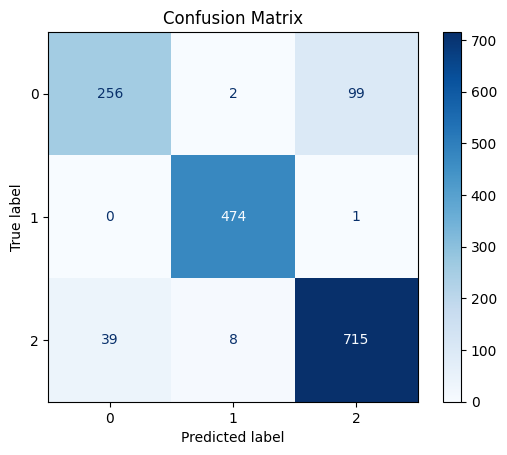

In [146]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 2. Bandingkan dengan model tanpa clustering


*   Melihat apakah clustering membantu meningkatkan akurasi model.




In [147]:
X_no_cluster = df_cleaned.drop(columns=["title", "cluster"])

X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_cluster, y, test_size=0.2, random_state=42)

model_nc = KNeighborsClassifier(n_neighbors=5)
model_nc.fit(X_train_nc, y_train_nc)

y_pred_nc = model_nc.predict(X_test_nc)
acc_nc = accuracy_score(y_test_nc, y_pred_nc)
print("Akurasi Model Tanpa Clustering:", acc_nc)

Akurasi Model Tanpa Clustering: 0.9065244667503137


# Kesimpulan dari perbandingan model:

Kesimpulan dari perbandingan model menunjukkan bahwa meskipun clustering memberikan wawasan tambahan dalam analisis eksplorasi, penggunaan clustering tidak menghasilkan peningkatan yang signifikan pada performa model klasifikasi. Model tanpa clustering sudah mampu memberikan prediksi yang sangat akurat. Hal ini menunjukkan bahwa fitur yang digunakan dalam model sudah cukup kuat untuk membedakan kategori secara efektif, sehingga model dapat mengenali pola dengan baik tanpa memerlukan bantuan clustering. Oleh karena itu, meskipun clustering bermanfaat untuk eksplorasi data, dalam hal ini tidak memberikan kontribusi tambahan yang berarti terhadap akurasi model klasifikasi.